# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60000, 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 

## STEP #1: IMPORT LIBRARIES/DATASETS

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [94]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [95]:
X_train.shape


(50000, 32, 32, 3)

In [96]:
X_test.shape

(10000, 32, 32, 3)

In [97]:
y_train.shape

(50000, 1)

In [98]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[1]


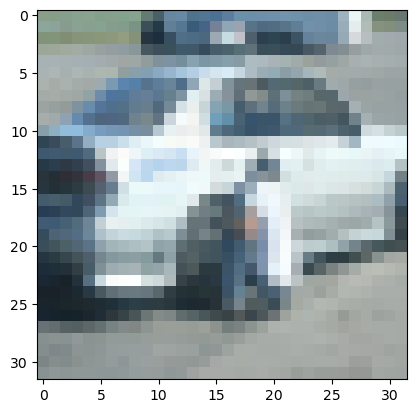

In [100]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

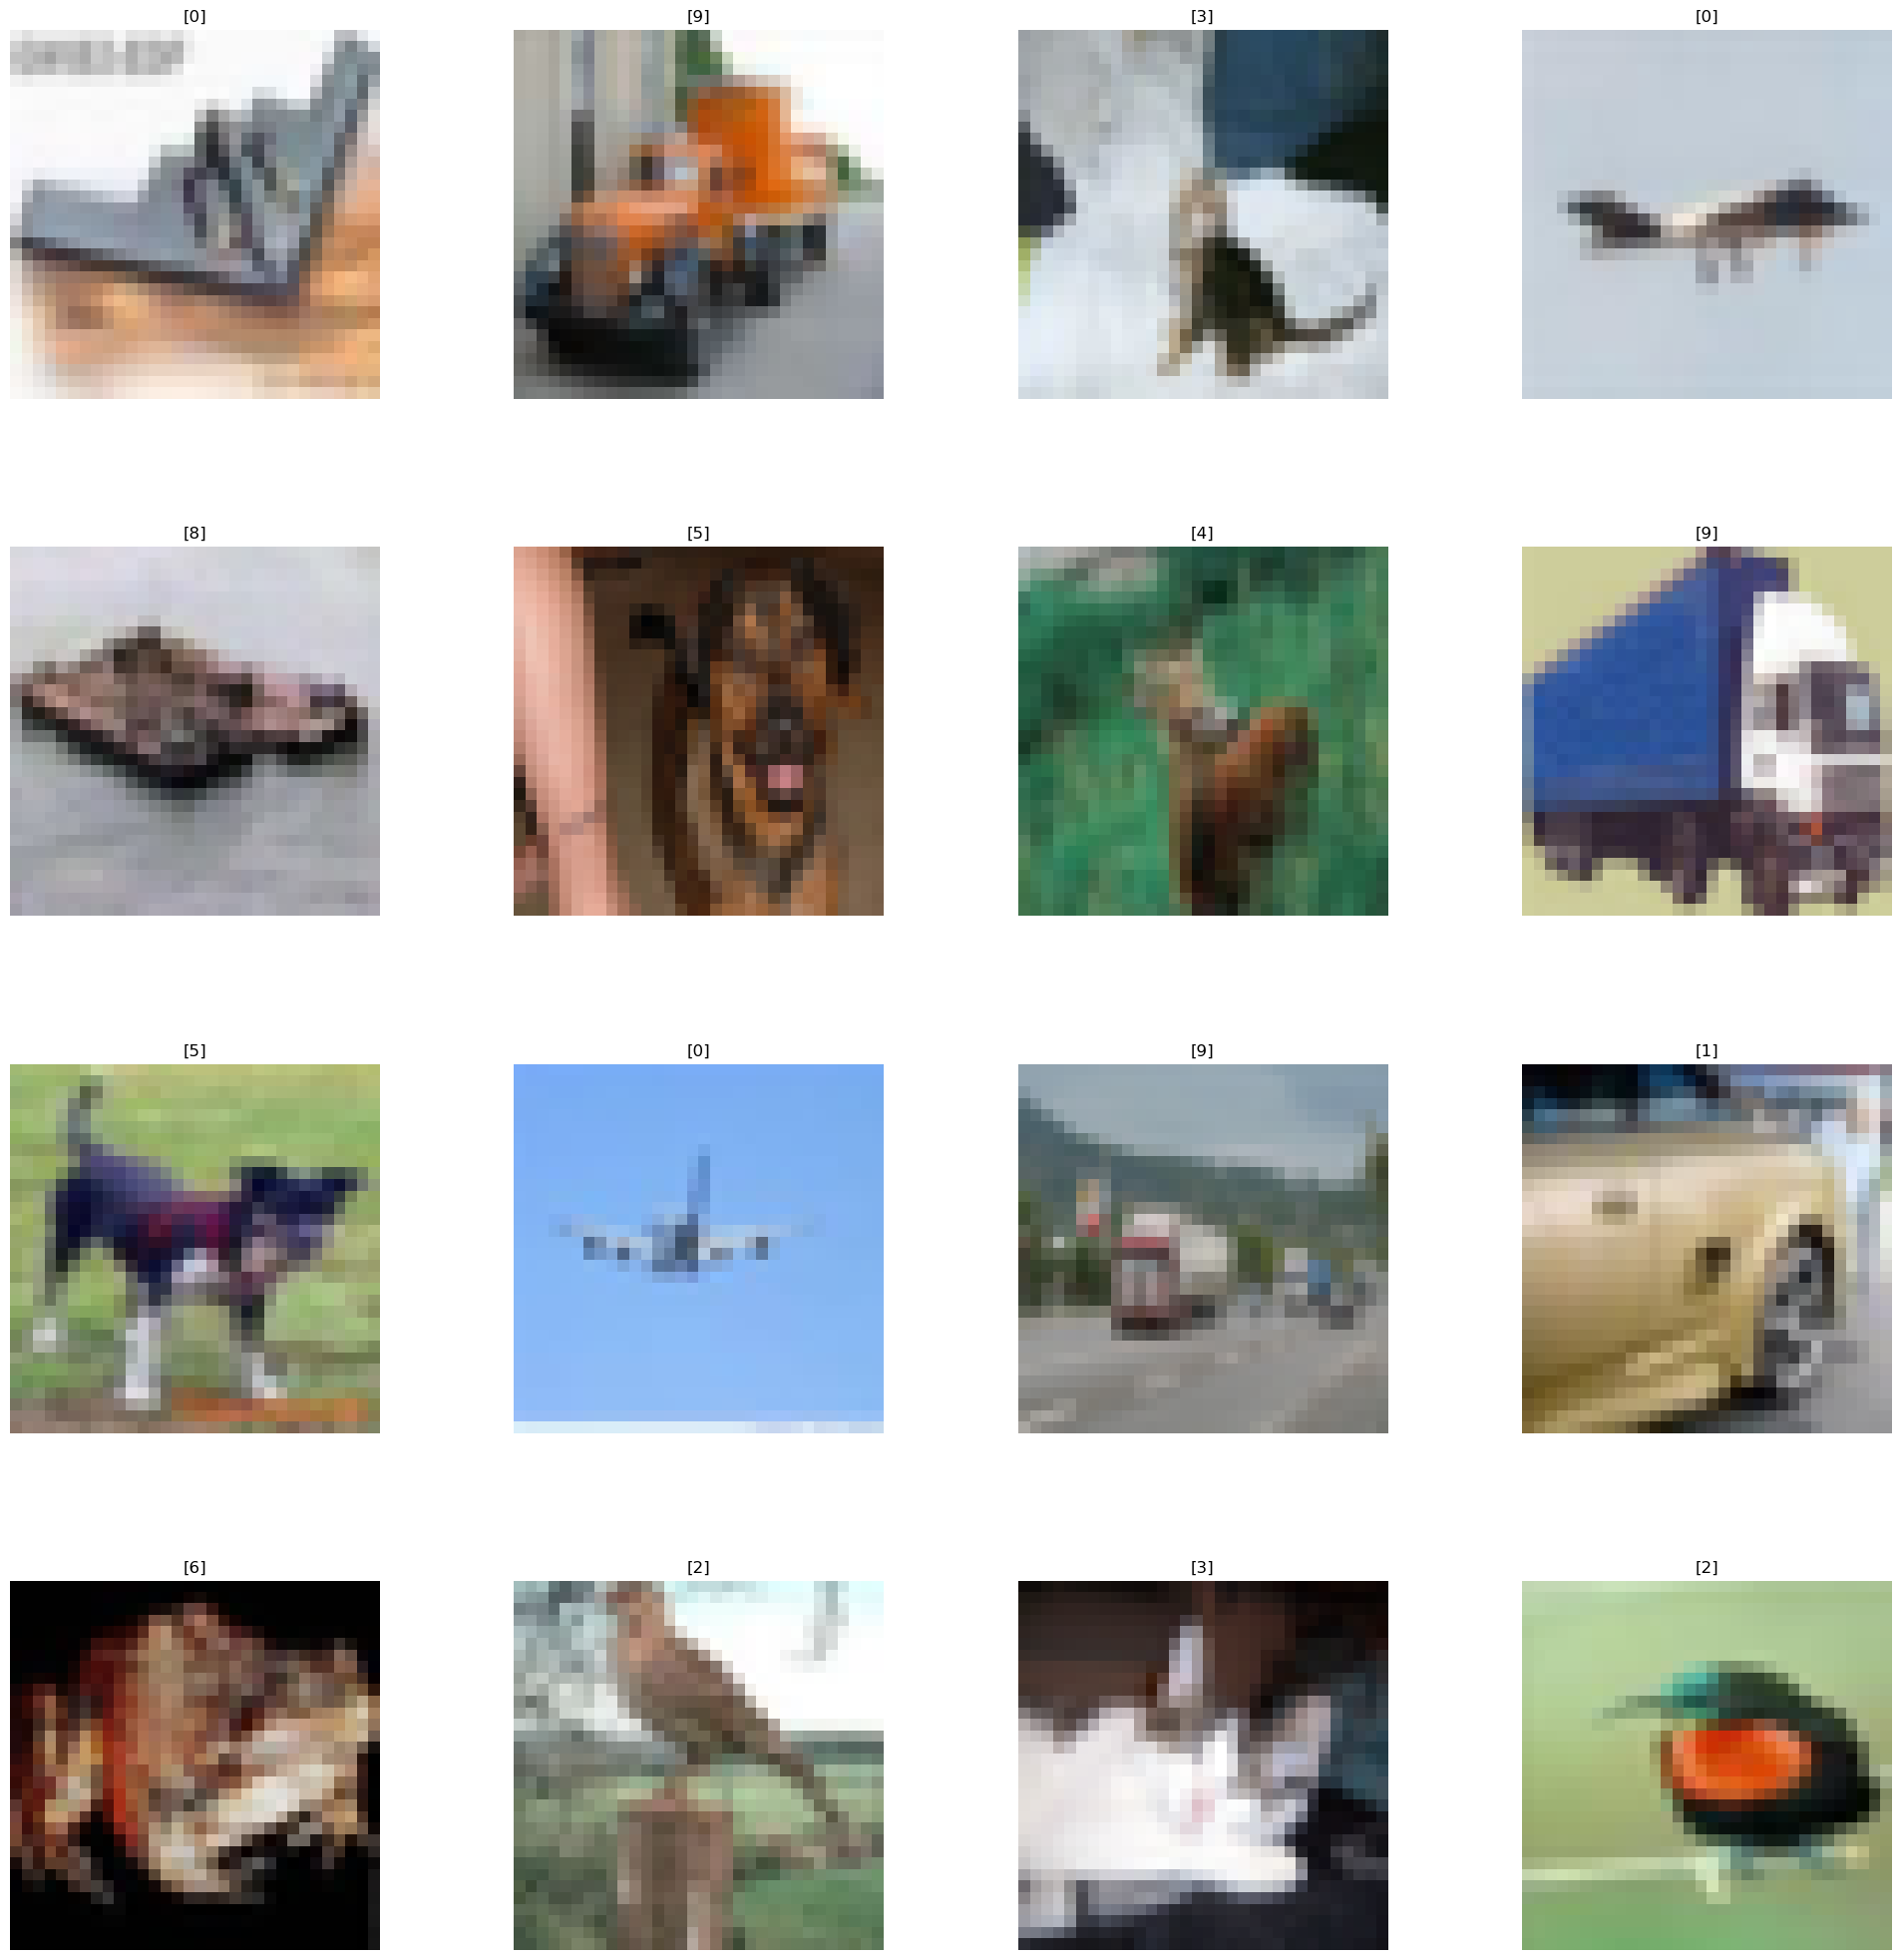

In [101]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [102]:
n_training

50000

# STEP #3: DATA PREPARATION

In [103]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [104]:
number_cat = 10

In [105]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [106]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [107]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [108]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [109]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [110]:
X_train = X_train/255
X_test = X_test/255

In [111]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [112]:
X_train.shape

(50000, 32, 32, 3)

In [113]:
Input_shape = X_train.shape[1:]

In [114]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [115]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [116]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [117]:
from tensorflow.keras.optimizers import RMSprop

In [118]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [119]:
X_train.shape

(50000, 32, 32, 3)

In [120]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 215s 135ms/step - accuracy: 0.3106 - loss: 1.8654
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 131ms/step - accuracy: 0.5817 - loss: 1.1896
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 134ms/step - accuracy: 0.6613 - loss: 0.9869
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 134ms/step - accuracy: 0.6933 - loss: 0.9064
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.7106 - loss: 0.8572


# STEP #5: EVALUATE THE MODEL

In [122]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7335 - loss: 0.7924
Test Accuracy: 0.7289000153541565


In [128]:
# Get the predicted probabilities for each class
predicted_probabilities = cnn_model.predict(X_test)
# print(predicted_probabilities)
# Convert the predicted probabilities into class labels (the index of the maximum probability)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Now, 'predicted_classes' contains the predicted class labels
print(predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step
[3 8 8 ... 5 4 7]


In [129]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [ ]:
y_test = y_test.argmax(1)

In [134]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

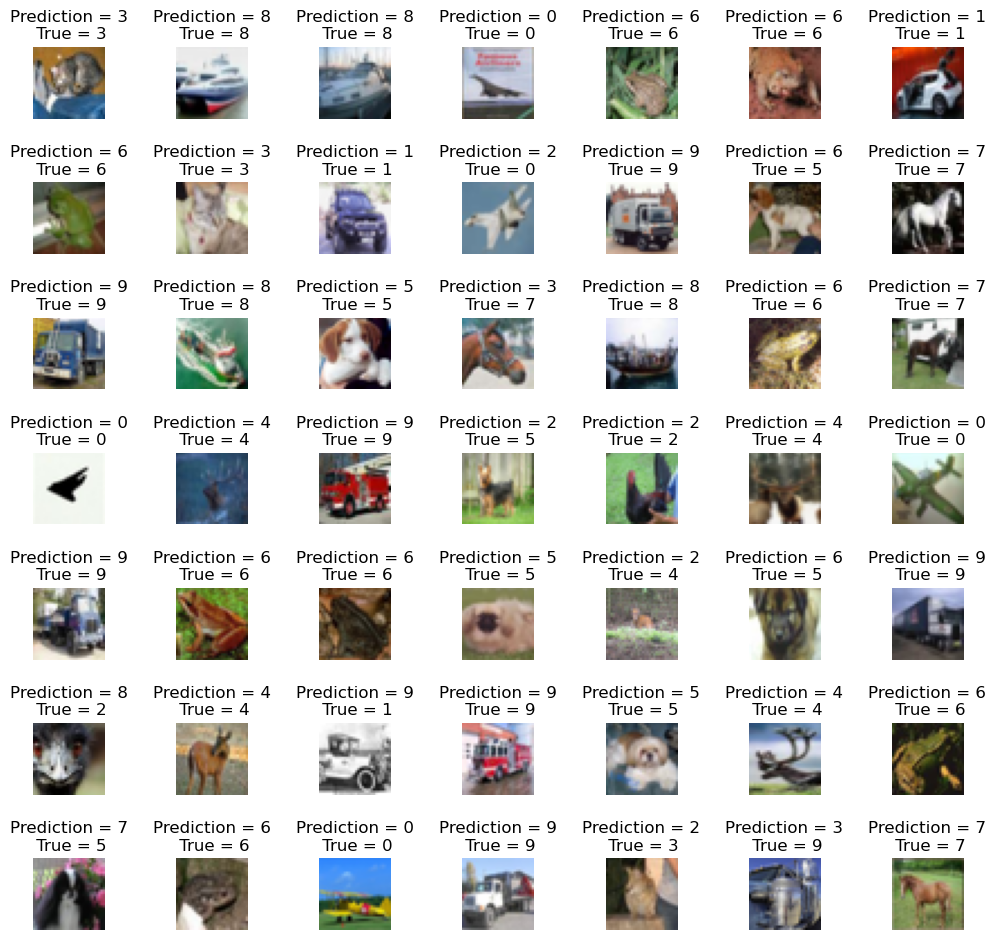

In [135]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<Axes: >

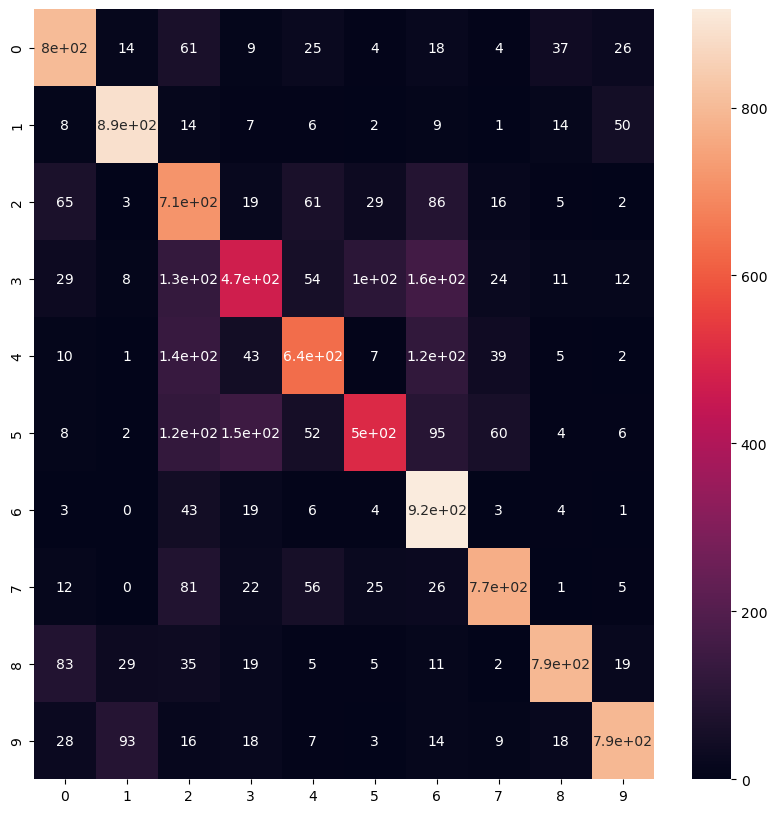

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [138]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [175]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [176]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [177]:
X_train.shape

(50000, 32, 32, 3)

In [178]:
n = 8 
X_train_sample = X_train[:n]

In [179]:
X_train_sample.shape

(8, 32, 32, 3)

In [180]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 
dataget_train = ImageDataGenerator(brightness_range=(1,3),
                                   rotation_range=90)

dataget_train.fit(X_train_sample)


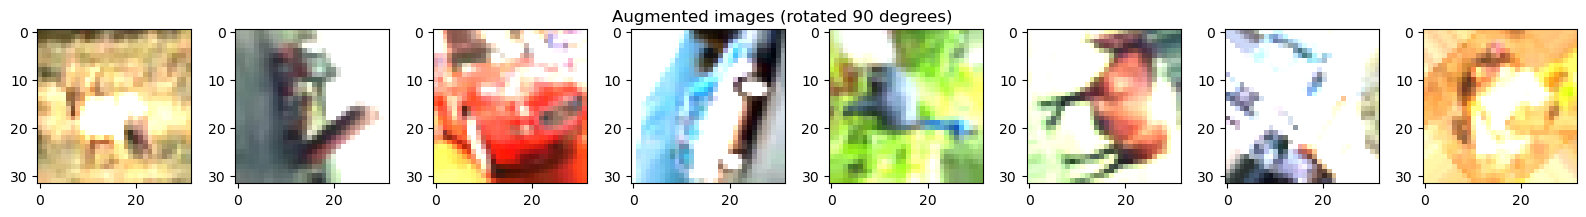

In [181]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Visualization
fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        
        # Convert NumPy array to image using Pillow's Image.fromarray
        img = Image.fromarray(np.uint8(x_batch[i]))
        
        # Display the image
        ax.imshow(img)
    
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [182]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [184]:
datagen.fit(X_train)

In [185]:
from keras.utils import to_categorical

In [186]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [187]:
y_train.shape

(50000, 10)

In [188]:
y_test.shape

(10000, 10)

In [191]:
history1 = cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32),epochs =5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - accuracy: 0.2256 - loss: 2.1083
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 136ms/step - accuracy: 0.2550 - loss: 2.0052
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 395s 253ms/step - accuracy: 0.2700 - loss: 1.9562
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 385s 246ms/step - accuracy: 0.2736 - loss: 1.9408
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 215s 137ms/step - accuracy: 0.2801 - loss: 1.9282


In [192]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.2532 - loss: 1.9511
Test accuracy 0.25029999017715454


In [193]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)